In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [200]:
df = pd.read_csv("3536553.csv", index_col="DATE", low_memory=False)
df.index = pd.to_datetime(df.index)
df["DOTY"] = df.index.day_of_year
df["Year"] = df.index.year
df['2000-01-01':'2000-01-01']["SNWD"]
df.fillna(0)
df["WSFX"] = df[['WSF1', 'WSF2',"WSFG"]].max(axis=1)
df["WDFX"] = df[['WDF1', 'WDF2',"WDFG"]].max(axis=1)
features_list = ["AWND","PRCP","SNOW","SNWD","TMAX","TMIN","WDF1","WSF1","WDF2","WSF2","WDFX","WSFX"]




In [191]:
print(df['1970-01-01':'1970-01-01'][features_list])
print(np.max(df['1970-01-01':'2023-01-01']['SNWD']))

count_tmax_1 = float((df['1959-01-01':'2023-10-01']['SNWD'] == 0.0).sum())
print(df.shape[0])
print(count_tmax_1)
print(count_tmax_1 / df.shape[0])


            AWND  PRCP  SNOW  SNWD  TMAX  TMIN  WDF1  WSF1  WDF2  WSF2  WDFX  \
DATE                                                                           
1970-01-01   NaN  0.13   1.4   5.0    29  10.0   NaN   NaN   NaN   NaN  90.0   

            WSFX  
DATE              
1970-01-01  11.4  
24.0
23731
20432.0
0.8609835236610341


In [205]:
#features_list = ["Year","DOTY","AWND","PRCP","SNOW","SNWD","TMAX","TMIN","WDF2","WSF2",'TSUN']
metrics_list = ["AWND","PRCP","SNOW","SNWD","TMAX","TMIN","WSF2","WDF2","ACMC","ACMH","ACSC","ACSH","TSUN"]
sun_list = ["ACMC","ACMH","ACSC","ACSH","TSUN","PSUN"]
wind_list = ["WSF1","WSF2","WSF5","WSFG"]
targets_list = ["SNWD"]
all_list = ["ACMC","ACMH","ACSC","ACSH","AWND","FMTM","PGTM","PRCP","PSUN","SNOW","SNWD","TAVG","TMAX","TMIN","TSUN",
            "WDF1","WDF2","WDF5","WDFG","WDFM","WESD","WSF1","WSF2","WSF5","WSFG","WSFM","WSFX"]

In [135]:
# Fit scalers
features = df['1984-08-01':'2023-08-01'][metrics_list].copy()
scalers = {}
for x in features.columns:
    scalers[x] = RobustScaler().fit(features[x].values.reshape(-1, 1))


# Transform data via scalers
norm_df = features.copy()
for i, key in enumerate(scalers.keys()):
    norm = scalers[key].transform(norm_df.iloc[:, i].values.reshape(-1, 1))
    norm_df.iloc[:, i] = norm

norm_df['1999-01-10':'1999-01-30']



norm_snwd = norm_df['1999-01-10':'1999-01-30']["SNWD"]

print(norm_snwd)

snwd = scalers["SNWD"].inverse_transform(norm_snwd.values.reshape(-1,1))

print(snwd)

for key in scalers.keys():
    print(key)
    print(scalers[key].inverse_transform(norm_df['1999-01-10':'1999-01-30'][key].values.reshape(-1,1)))


DatetimeIndex(['1999-01-10', '1999-01-11', '1999-01-12', '1999-01-13',
               '1999-01-14', '1999-01-15', '1999-01-16', '1999-01-17',
               '1999-01-18', '1999-01-19', '1999-01-20', '1999-01-21',
               '1999-01-22', '1999-01-23', '1999-01-24', '1999-01-25',
               '1999-01-26', '1999-01-27', '1999-01-28', '1999-01-29',
               '1999-01-30'],
              dtype='datetime64[ns]', name='DATE', freq=None)
DATE
1999-01-10    17.0
1999-01-11    20.0
1999-01-12    22.0
1999-01-13    24.0
1999-01-14    24.0
1999-01-15    24.0
1999-01-16    22.0
1999-01-17    17.0
1999-01-18    12.0
1999-01-19    10.0
1999-01-20     9.0
1999-01-21     9.0
1999-01-22     3.0
1999-01-23     1.0
1999-01-24     1.0
1999-01-25     4.0
1999-01-26     0.0
1999-01-27     0.0
1999-01-28     0.0
1999-01-29     0.0
1999-01-30     0.0
Name: SNWD, dtype: float64
[[17.]
 [20.]
 [22.]
 [24.]
 [24.]
 [24.]
 [22.]
 [17.]
 [12.]
 [10.]
 [ 9.]
 [ 9.]
 [ 3.]
 [ 1.]
 [ 1.]
 [ 4.]
 [ 0.]
 [ 

In [206]:
missing = df['1984-01-01':'2023-01-01'].apply(pd.isnull).sum() / df['1980-01-01':'2023-01-01'].shape[0]
extras = ["ACMC","ACMH","ACSC","ACSH","AWND","FMTM","PGTM","PRCP","PSUN"]
missing[all_list]
#df['1984-01-01':'2023-01-01'][df['SNWD'].isna()]



ACMC    0.906920
ACMH    0.639969
ACSC    0.906920
ACSH    0.639778
AWND    0.000127
FMTM    0.260903
PGTM    0.316037
PRCP    0.000000
PSUN    0.906984
SNOW    0.000000
SNWD    0.000000
TAVG    0.510091
TMAX    0.000000
TMIN    0.000000
TSUN    0.566817
WDF1    0.639715
WDF2    0.267397
WDF5    0.271217
WDFG    0.641625
WDFM    0.906984
WESD    0.512192
WSF1    0.639778
WSF2    0.267397
WSF5    0.271153
WSFG    0.641052
WSFM    0.906984
WSFX    0.000064
dtype: float64

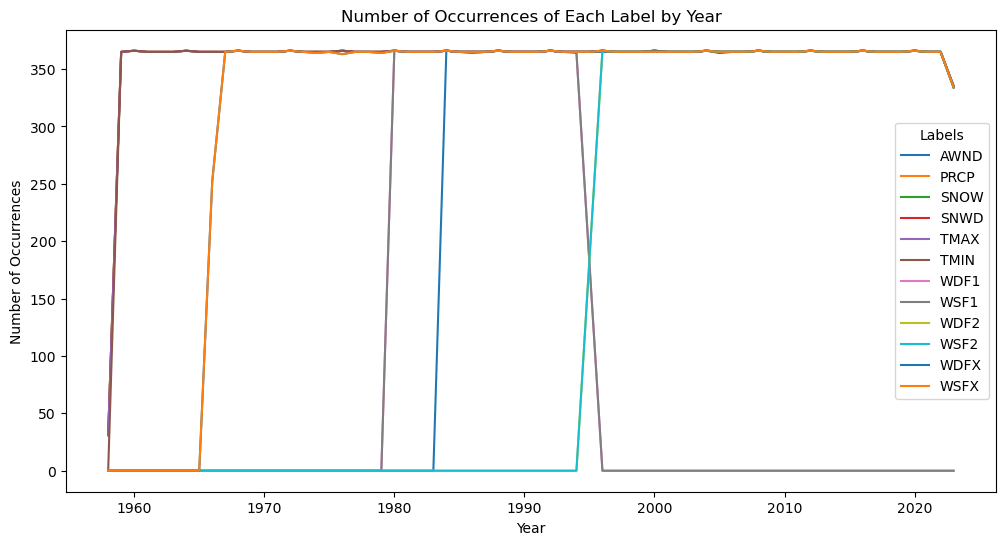

In [203]:
#features_list = ["AWND","PRCP","SNOW","SNWD","TMAX","TMIN","WDFX","WSFX"]
counts_by_year = df.groupby("Year")[features_list].count()
counts_by_year.plot(figsize=(12, 6))
plt.title('Number of Occurrences of Each Label by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels')
plt.savefig("figures/counts_features.png")

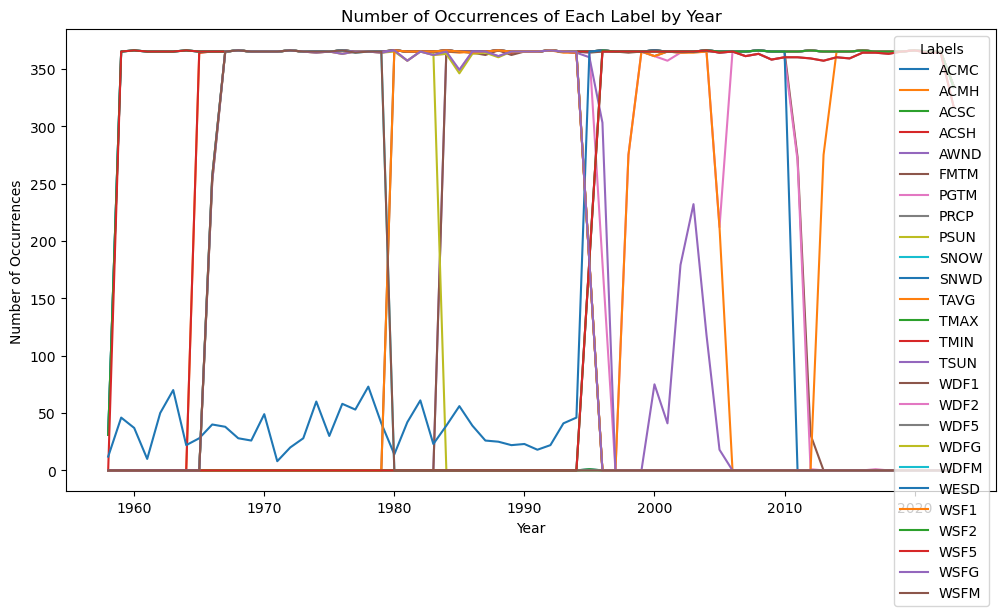

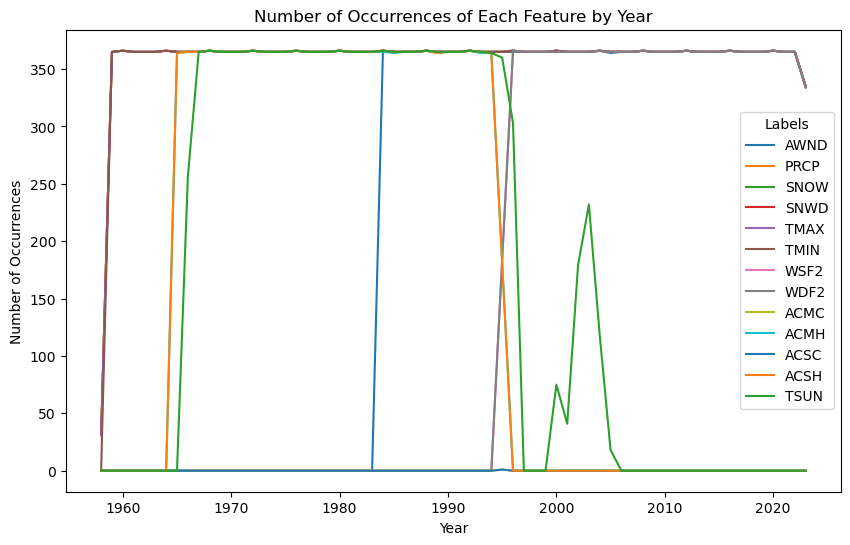

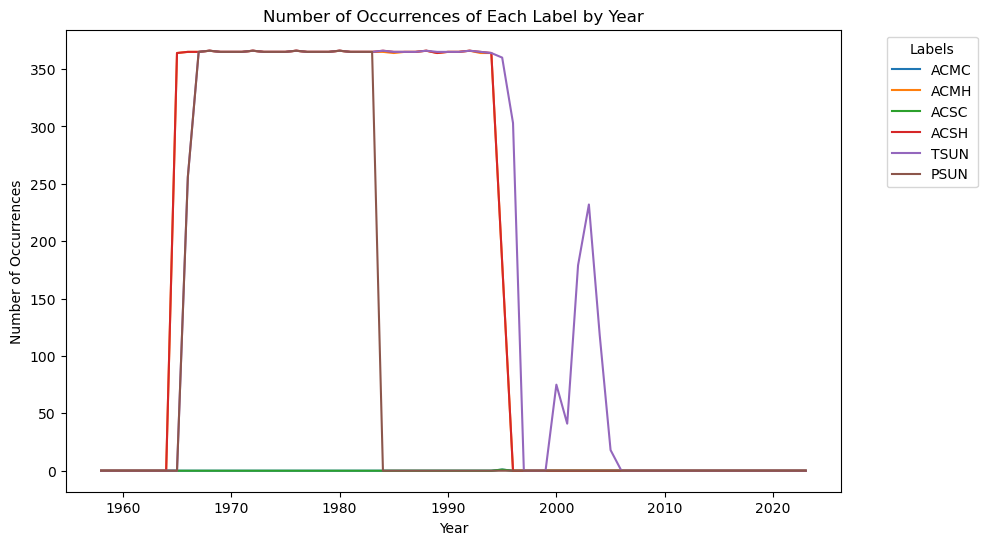

"\nlabel_counts_by_year_1.plot(figsize=(10, 6))\nplt.title('Number of Occurrences of Each Label by Year')\nplt.xlabel('Year')\nplt.ylabel('Number of Occurrences')\nplt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')\nplt.show()\n"

In [204]:
feature_counts_by_year = df.groupby("Year")[all_list].count()
#label_counts_by_year_1 = df.groupby("Year")[].sum()
feature_counts_by_year.plot(figsize=(12, 6))
plt.title('Number of Occurrences of Each Label by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels')
plt.savefig("figures/counts_all.png")

feature_counts_by_year_1 = df.groupby("Year")[metrics_list].count()
feature_counts_by_year_1.plot(figsize=(10, 6))
plt.title('Number of Occurrences of Each Feature by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels')
plt.savefig("figures/counts_metrics.png")
label_counts_by_year_0 = df.groupby("Year")[sun_list].count()
label_counts_by_year_0.plot(figsize=(10, 6))
plt.title('Number of Occurrences of Each Label by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
label_counts_by_year_2 = df.groupby("Year")[wind_list].count()
label_counts_by_year_2.plot(figsize=(10, 6))
plt.title('Number of Occurrences of Each Label by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
'''
label_counts_by_year_1.plot(figsize=(10, 6))
plt.title('Number of Occurrences of Each Label by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
'''
